In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Example: Benford's Law

In [4]:
digits = np.arange(1, 10)
benford_model = np.log10(1 + 1/digits)
benford_model

array([0.30103   , 0.17609126, 0.12493874, 0.09691001, 0.07918125,
       0.06694679, 0.05799195, 0.05115252, 0.04575749])

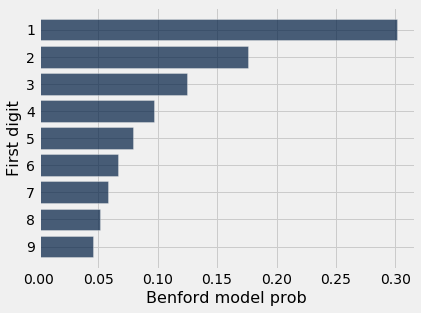

In [5]:
benford = Table().with_columns(
    'First digit', digits,
    'Benford model prob', benford_model)
benford.barh('First digit')

In [8]:
# You don't have to understand how this function works, since it uses Python features from beyond Data 8.
def first_digit(num):
    return int(str(num)[0])

In [9]:
first_digit(32)

3

In [10]:
first_digit(17719087)

1

In [11]:
# County populations from the census data
counties = Table.read_table('counties.csv')
counties = counties.where('SUMLEV', 50).select(5,6,9).relabeled(0,'State').relabeled(1,'County').relabeled(2,'Population')
counties.show(3)

State,County,Population
Alabama,Autauga County,54684
Alabama,Baldwin County,183216
Alabama,Barbour County,27336


In [14]:
first_digits = counties.apply(first_digit, 'Population')
counties = counties.with_column('First digit', first_digits)
counties.show(3)

State,County,Population,First digit
Alabama,Autauga County,54684,5
Alabama,Baldwin County,183216,1
Alabama,Barbour County,27336,2


In [16]:
num_counties = counties.num_rows

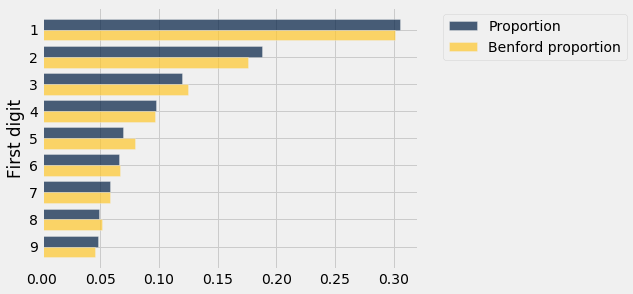

In [21]:
by_digit = counties.group('First digit')
proportions = by_digit.column('count')/num_counties
by_digit = by_digit.with_columns(
    'Proportion', proportions,
    'Benford proportion', benford_model
)
by_digit.drop('count').barh('First digit')

In [19]:
by_digit = counties.group('First digit')
by_digit

First digit,count
1,959
2,590
3,375
4,307
5,217
6,206
7,183
8,154
9,151


Null hypothesis: each county's population's first digit probability specified by the benford's model array.

Alternative hypothesis: the distribution of first digits is difference from benford's law


Test statistic: total variation distance between the observed digit distribution from the data and one from beneford_model

Fill in the blank with "Bigger" or "Smaller":

bigger values of the test statistic favor the alternative

In [22]:
observed_tvd = sum(abs(proportions - benford_model))/2
observed_tvd

0.01922756971800583

In [27]:
sample_proportions(num_counties, benford_model)

array([0.29567155, 0.18746022, 0.12221515, 0.08847868, 0.07924889,
       0.06970083, 0.0598345 , 0.0537874 , 0.0436028 ])

In [30]:
simulated_frequencies = sample_proportions(num_counties, benford_model)
tvd = sum(abs(simulated_frequencies - benford_model))/2
tvd

0.015261383584591268

In [38]:
def simulate_county_first_digits():
    simulated_frequencies = sample_proportions(num_counties, benford_model)
    tvd = sum(abs(simulated_frequencies - benford_model))/2
    return tvd
tvd

0.015261383584591268

In [39]:
simulated_tvds = make_array()

for i in np.arange(10000):
    simulated_tvds = np.append(simulated_tvds, simulate_county_first_digits())
simulated_tvds

array([0.02161122, 0.01797002, 0.01481223, ..., 0.0082173 , 0.0136024 ,
       0.01351427])

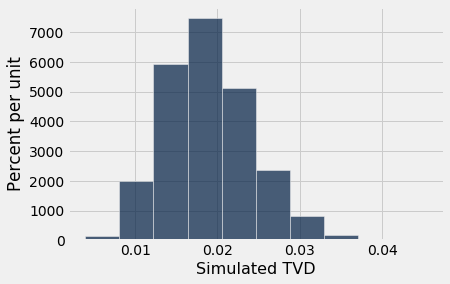

In [43]:
Table().with_column('Simulated TVD', simulated_tvds).hist()

In [44]:
np.average(simulated_tvds >= observed_tvd) 

0.4464

Are the data consistent with the null hypothesis?

## Example: sleep survey

In [ ]:
survey = Table.read_table('welcome_survey_v4.csv')
survey

In [ ]:
def simplify(sleep_position):
    if sleep_position == 'On your left side' or sleep_position == 'On your right side':
        return 'side'
    else:
        return 'back or stomach'
    
survey = survey.with_column(
    'position',
    survey.apply(simplify, 'Sleep position')
).select('position', 'Hours of sleep')

survey

In [ ]:
survey.group('position', np.average)

Null hypothesis: 

Alternative hypothesis: 

Test statistic: ___

Fill in the blank with "Bigger" or "Smaller":

___ values of the test statistic favor the alternative

In [ ]:
def compute_test_statistic(tbl):
    grouped = tbl.group('position', np.average)
    avgs = grouped.column('Hours of sleep average')
    return avgs.item(1) - avgs.item(0)

In [ ]:
obs_test_stat = compute_test_statistic(survey)
obs_test_stat

In [ ]:
random_labels = survey.sample(with_replacement=False).column('position')

In [ ]:
def simulate_under_null():
    random_labels = survey.sample(with_replacement=False).column('position')
    relabeled_tbl = survey.with_column('position', random_labels)
    return compute_test_statistic(relabeled_tbl)


In [ ]:
simulated_diffs = make_array()
for i in np.arange(1000):
    null_stat = simulate_under_null()
    simulated_diffs = np.append(simulated_diffs, null_stat)

In [ ]:
Table().with_column('Simulated difference', simulated_diffs).hist(0)

In [ ]:
obs_test_stat

In [ ]:
np.mean(simulated_diffs <= obs_test_stat)

Are the data consistent with the null hypothesis?